# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [ ]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [ ]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 49.7 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


### Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [ ]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
df_data.shape

(4324, 9)

In [ ]:
df_data.sample(5)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
2454,2454,2454,RVSN USSR,"Site 132/2, Plesetsk Cosmodrome, Russia","Tue Jul 01, 1980 07:12 UTC",Cosmos-3M (11K65M) | Cosmos 1190,StatusRetired,NaN,Success
3880,3880,3880,General Dynamics,"SLC-4E, Vandenberg AFB, California, USA","Sat May 14, 1966 18:30 UTC",Atlas-SLV3 Agena-D | KH-7 Gambit 4028,StatusRetired,NaN,Success
3301,3301,3301,RVSN USSR,"Site 41/1, Plesetsk Cosmodrome, Russia","Tue Nov 02, 1971 14:25 UTC",Voskhod | Cosmos 454,StatusRetired,NaN,Success
403,403,403,Northrop,"LP-0A, Wallops Flight Facility, Virginia, USA","Mon Oct 17, 2016 23:45 UTC",Antares 230 | CRS OA-5,StatusRetired,85.0,Success
1132,1132,1132,Boeing,"SLC-17A, Cape Canaveral AFS, Florida, USA","Wed Aug 08, 2001 16:13 UTC",Delta II 7326 | Genesis Probe,StatusRetired,NaN,Success


In [ ]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [ ]:
df_data.isna().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

In [ ]:
df_data.duplicated().sum()

0

In [ ]:
df_data.rename(columns={'Unnamed: 0.1': 'col1', 'Unnamed: 0': 'col2'}, inplace=True)

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [ ]:
df_data.drop(['col1', 'col2'], axis=1, inplace=True)

In [ ]:
df_data.sample(5)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
2840,RVSN USSR,"Site 132/1, Plesetsk Cosmodrome, Russia","Fri Mar 12, 1976 13:30 UTC",Cosmos-3M (11K65M) | Cosmos 807,StatusRetired,NaN,Success
576,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia","Sat Dec 28, 2013 12:30 UTC",Soyuz 2.1v/Volga | Cosmos 2492 and 2493 & AIST...,StatusActive,NaN,Success
1401,Lockheed,"SLC-40, Cape Canaveral AFS, Florida, USA","Sun Feb 23, 1997 20:20 UTC",Titan IV(402)B | DSP,StatusRetired,NaN,Success
1817,RVSN USSR,"Site 43/3, Plesetsk Cosmodrome, Russia","Wed Jun 13, 1990 01:07 UTC",Molniya-M /Block ML | Molniya-3 n†­143,StatusRetired,NaN,Success
424,Roscosmos,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Thu Jul 07, 2016 01:36 UTC",Soyuz FG | Soyuz MS-01,StatusRetired,NaN,Success


In [ ]:
df_data.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


## Descriptive Statistics

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4324 non-null   object
 1   Location        4324 non-null   object
 2   Date            4324 non-null   object
 3   Detail          4324 non-null   object
 4   Rocket_Status   4324 non-null   object
 5   Price           964 non-null    object
 6   Mission_Status  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


In [ ]:
df_data.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4324 non-null   object
 1   Location        4324 non-null   object
 2   Date            4324 non-null   object
 3   Detail          4324 non-null   object
 4   Rocket_Status   4324 non-null   object
 5   Price           964 non-null    object
 6   Mission_Status  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [ ]:
df_data.sample(5)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
4159,US Air Force,"SLC-1E (75-3-5), Vandenberg AFB, California, USA","Tue May 15, 1962 19:36 UTC",Thor DM-21 Agena-B | FTV 1126,StatusRetired,NaN,Success
1286,ILS,"SLC-36B, Cape Canaveral AFS, Florida, USA","Fri Oct 09, 1998 22:50 UTC",Atlas IIA | Hot Bird 5,StatusRetired,NaN,Success
3419,RVSN USSR,"Site 90/19, Baikonur Cosmodrome, Kazakhstan","Tue Oct 20, 1970 05:38 UTC",Tsyklon-2 | Cosmos 373,StatusRetired,NaN,Success
1798,RVSN USSR,"Site 43/4, Plesetsk Cosmodrome, Russia","Thu Sep 20, 1990 20:16 UTC",Molniya-M /Block ML | Molniya-3 n†­145,StatusRetired,NaN,Success
995,Kosmotras,"Site 109/95, Baikonur Cosmodrome, Kazakhstan","Tue Jun 29, 2004 06:30 UTC",Dnepr | DEMETER & Others,StatusRetired,29.0,Success


In [ ]:
no_mission = df_data.Organisation.value_counts()

In [ ]:
plt.figure(figsize=(5,3))
fig = px.bar(x=no_mission.index
       , y=no_mission.values)
fig.update_layout(xaxis_title=('Organisation'), yaxis_title=('no. of mission'))

<Figure size 500x300 with 0 Axes>

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [ ]:
df_data.sample(5)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
2261,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sat Jun 18, 1983 11:33 UTC",Space Shuttle Challenger | STS-7,StatusRetired,450.0,Success
3716,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Thu Nov 09, 1967 12:00 UTC",Saturn V | Apollo 4,StatusRetired,"1,160.0",Success
2180,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Thu Aug 30, 1984 12:41 UTC",Space Shuttle Discovery | STS-41-D,StatusRetired,450.0,Success
1134,Lockheed,"SLC-36A, Cape Canaveral AFS, Florida, USA","Mon Jul 23, 2001 07:23 UTC",Atlas IIA | GOES-M,StatusRetired,NaN,Success
483,ULA,"SLC-3E, Vandenberg AFB, California, USA","Thu Oct 08, 2015 12:49 UTC",Atlas V 401 | NROL-55,StatusActive,109.0,Success


In [ ]:
rocket_status=df_data.Rocket_Status.value_counts()

In [ ]:
rocket_status
px.pie(labels=rocket_status.index, values=rocket_status.values)

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:138: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [ ]:
mission_status = df_data.Mission_Status.value_counts()

In [ ]:
mission_status

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

In [ ]:
px.pie(labels=mission_status.index, values = mission_status.values)

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:138: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



In [ ]:
ISRO = df_data.loc[df_data.Organisation == 'ISRO']

In [ ]:
expiry = ISRO.Rocket_Status.value_counts()

In [ ]:
mission = ISRO['Mission_Status'].value_counts()

In [ ]:
px.pie(values= mission.values, labels= mission.index, names=mission.index)

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:138: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



In [ ]:
px.pie(labels=expiry.index, values=expiry.values, names=expiry.index)

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:138: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

In [ ]:
df_data['Price'] = pd.to_numeric(df_data.Price, errors='coerce')

In [ ]:
px.histogram(df_data, x='Price')

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [ ]:
df_data.head(3)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success


In [ ]:
# get the country name
df_data['country'] = df_data['Location'].apply(lambda x: x.split(',')[-1].strip())
df_data.country.value_counts()

Russia                            1395
USA                               1344
Kazakhstan                         701
France                             303
China                              268
Japan                              126
India                               76
Pacific Ocean                       36
New Zealand                         13
Iran                                13
Israel                              11
Kenya                                9
Australia                            6
North Korea                          5
New Mexico                           4
South Korea                          3
Barents Sea                          3
Brazil                               3
Gran Canaria                         2
Pacific Missile Range Facility       1
Yellow Sea                           1
Shahrud Missile Test Site            1
Name: country, dtype: int64

In [ ]:
df_data['country'].replace(
    {
        'Russia':'Russian Federation',
        'Iran':'Iran, Islamic Republic of',
        'New Mexico':'USA',
        'Barents Sea':'Russian Federation',
        'Gran Canaria':'USA',
        'Yellow Sea':'China',
        'Shahrud Missile Test Site':'Iran, Islamic Republic of',
        'Pacific Missile Range Facility':'USA',
        'North Korea':"Korea, Democratic People's Republic of",
        'Pacific Ocean':'Kiribati',
        'South Korea':'Korea, Republic of'
    },
    inplace=True
)

# df_data['country'] = df_data['country'].apply(lambda x: countries.get(x, none).alpha3)
# df_data['country'].value_counts()

In [ ]:
df_data['country'] = df_data['country'].apply(lambda x: countries.get(x, None).alpha3)
df_data['country'].value_counts()

RUS    1398
USA    1351
KAZ     701
FRA     303
CHN     269
JPN     126
IND      76
KIR      36
IRN      14
NZL      13
ISR      11
KEN       9
AUS       6
PRK       5
KOR       3
BRA       3
Name: country, dtype: int64

In [ ]:
no_launch = df_data.country.value_counts()

In [ ]:
px.choropleth(df_data, locations=no_launch.index, color=no_launch.values
              , color_continuous_scale="inferno",
              labels={'color':'no. of launches'})

# Use a Choropleth Map to Show the Number of Failures by Country


In [ ]:
df = df_data.loc[df_data.Mission_Status == 'Failure']

In [ ]:
failure = df.country.value_counts()

In [ ]:
px.choropleth(df, locations=failure.index, color=failure.values, labels={'color':'Mission Failed'}, color_continuous_scale='inferno')

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [ ]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA


In [ ]:
px.sunburst(df_data, path=[df_data.country, df_data.Organisation, df_data.Mission_Status],title='Mission Status by Country and Organization')

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [ ]:
df_data['Date'] = pd.to_datetime(df_data['Date'], utc=True) # convert Date column into datetime
df_data['Date']

0      2020-08-07 05:12:00+00:00
1      2020-08-06 04:01:00+00:00
2      2020-08-04 23:57:00+00:00
3      2020-07-30 21:25:00+00:00
4      2020-07-30 11:50:00+00:00
                  ...           
4319   1958-02-05 07:33:00+00:00
4320   1958-02-01 03:48:00+00:00
4321   1957-12-06 16:44:00+00:00
4322   1957-11-03 02:30:00+00:00
4323   1957-10-04 19:28:00+00:00
Name: Date, Length: 4324, dtype: datetime64[ns, UTC]

In [ ]:
df_data['Price'] = df_data['Price'].apply(lambda x:str(x).replace(',','')).astype('float64') # convert to float
df_data['Price'].isna().sum()

3375

In [ ]:
money_spend = df_data.groupby('Organisation')['Price'].sum()
money_spend=money_spend[money_spend!=0].sort_values(ascending=False)

In [ ]:
px.bar( x=money_spend.index, y=money_spend.values, labels='cost of the mission')

# Analyse the Amount of Money Spent by Organisation per Launch

In [ ]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA


In [ ]:
df_data.groupby('Organisation')['Price'].mean()

Organisation
AEB                   NaN
AMBA                  NaN
ASI                   NaN
Arianespace        170.26
Arm??e de l'Air       NaN
Blue Origin           NaN
Boeing             177.29
CASC                40.13
CASIC                 NaN
CECLES                NaN
CNES                  NaN
Douglas               NaN
EER                 20.00
ESA                 37.00
Eurockot            41.80
ExPace              28.30
Exos                  NaN
General Dynamics      NaN
IAI                   NaN
ILS                101.54
IRGC                  NaN
ISA                   NaN
ISAS                  NaN
ISRO                32.49
JAXA                56.00
KARI                  NaN
KCST                  NaN
Khrunichev            NaN
Kosmotras           29.00
Land Launch           NaN
Landspace             NaN
Lockheed            35.00
MHI                 95.47
MITT                  NaN
Martin Marietta     80.16
NASA               450.00
Northrop            47.35
OKB-586               NaN

# Chart the Number of Launches per Year

In [ ]:
df_data.head(2)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    4324 non-null   object             
 1   Location        4324 non-null   object             
 2   Date            4324 non-null   datetime64[ns, UTC]
 3   Detail          4324 non-null   object             
 4   Rocket_Status   4324 non-null   object             
 5   Price           949 non-null    float64            
 6   Mission_Status  4324 non-null   object             
 7   country         4324 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(6)
memory usage: 270.4+ KB


In [ ]:
df_data['year']= df_data['Date'].dt.year

In [ ]:
df_data.sample(10)
per_year = df_data.groupby('year')['Detail'].count()

In [ ]:
per_year

year
1957      3
1958     28
1959     20
1960     39
1961     52
       ... 
2016     90
2017     92
2018    117
2019    109
2020     63
Name: Detail, Length: 64, dtype: int64

Text(0, 0.5, 'launches')

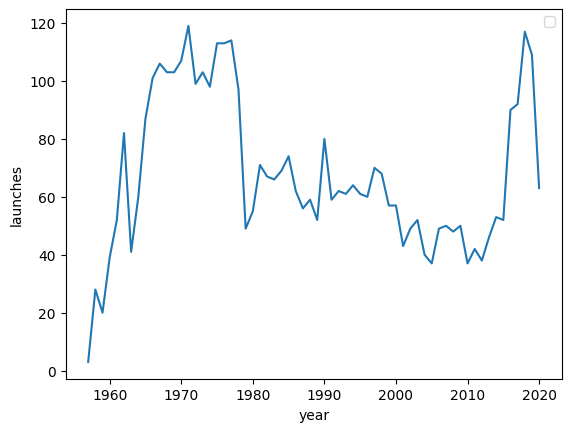

In [ ]:
plt.plot(per_year.index, per_year.values)
plt.xlabel('year')
plt.legend()
plt.ylabel('launches')

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [ ]:
df_data.sample(2)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country,year
2344,RVSN USSR,"Site 132/2, Plesetsk Cosmodrome, Russia",1982-03-31 09:00:00+00:00,Cosmos-3M (11K65M) | Cosmos 1345,StatusRetired,NaN,Success,RUS,1982
4297,AMBA,"LC-5, Cape Canaveral AFS, Florida, USA",1958-10-23 03:21:00+00:00,Juno I | Beacon 1,StatusRetired,NaN,Failure,USA,1958


In [ ]:
df_data['month'] = df_data['Date'].dt.month

In [ ]:
df_data.sample(4)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country,year,month
2047,RVSN USSR,"Site 132/1, Plesetsk Cosmodrome, Russia",1986-09-03 09:00:00+00:00,Cosmos-3M (11K65M) | Cosmos 1776,StatusRetired,NaN,Success,RUS,1986,9
657,ESA,"ELV-1 (SLV), Guiana Space Centre, French Guian...",2012-02-13 10:00:00+00:00,"Vega | Lares, AlmaSat-1 & 7 cubesats",StatusActive,37.00,Success,FRA,2012,2
3760,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1967-06-17 02:36:00+00:00,Molniya-M /Block VL | Cosmos 167,StatusRetired,NaN,Partial Failure,KAZ,1967,6
936,Arianespace,"ELA-3, Guiana Space Centre, French Guiana, France",2005-12-21 23:33:00+00:00,Ariane 5 GS | INSAT-4A & MSG-2,StatusRetired,NaN,Success,FRA,2005,12


In [ ]:
month = df_data.groupby('month')['Detail'].count()

In [ ]:
month

month
1     268
2     336
3     353
4     383
5     326
6     402
7     351
8     373
9     365
10    381
11    336
12    450
Name: Detail, dtype: int64

Text(0, 0.5, 'launches')

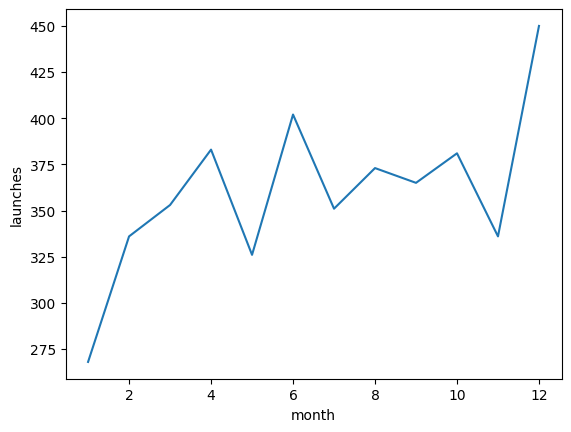

In [ ]:
plt.plot(month.index, month.values)
plt.xlabel('month')
plt.ylabel('launches')

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [ ]:
month.sort_values(ascending=False)

month
12    450
6     402
4     383
10    381
8     373
9     365
3     353
7     351
2     336
11    336
5     326
1     268
Name: Detail, dtype: int64

# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

In [ ]:
price_overtime=df_data.dropna().groupby('Date')['Price'].mean()

In [ ]:
price_overtime=price_overtime.rolling(25).mean()

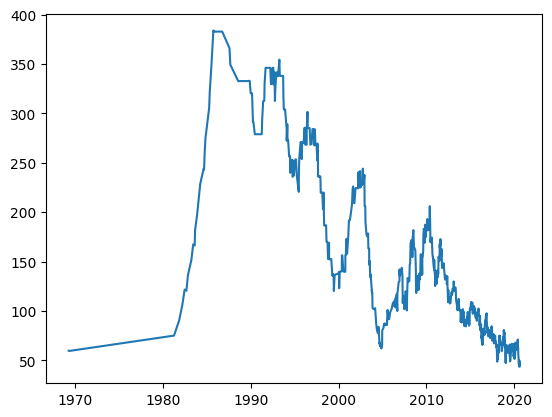

In [ ]:
plt.plot(price_overtime.index, price_overtime.values)

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [ ]:
top_organisation = df_data['Organisation'].value_counts().sort_values(ascending=False).head(10)

In [ ]:
top_organisation

RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
Name: Organisation, dtype: int64

In [ ]:
launches_by_top = df_data[df_data['Organisation'].isin(df_data.Organisation)].groupby(['year', 'Organisation'])['Detail'].count().unstack()

In [ ]:
launches_by_top.fillna(0, inplace=True)

In [ ]:
launches_by_top

Organisation,AEB,AMBA,ASI,Arianespace,Arm??e de l'Air,Blue Origin,Boeing,CASC,CASIC,CECLES,...,SpaceX,Starsem,ULA,US Air Force,US Navy,UT,VKS RF,Virgin Orbit,Yuzhmash,i-Space
year,,,,,,,,,,,,,,,,,,,,,
1957,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
1958,0.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,2.00,12.00,0.00,0.00,0.00,0.00,0.00
1959,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,10.00,4.00,0.00,0.00,0.00,0.00,0.00
1960,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,21.00,0.00,0.00,0.00,0.00,0.00,0.00
1961,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,23.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,0.00,0.00,0.00,11.00,0.00,4.00,0.00,22.00,0.00,0.00,...,9.00,0.00,12.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00
2017,0.00,0.00,0.00,11.00,0.00,1.00,0.00,16.00,1.00,0.00,...,18.00,0.00,8.00,0.00,0.00,0.00,6.00,0.00,0.00,0.00
2018,0.00,0.00,0.00,11.00,0.00,2.00,0.00,37.00,0.00,0.00,...,21.00,0.00,8.00,0.00,0.00,0.00,5.00,0.00,0.00,0.00


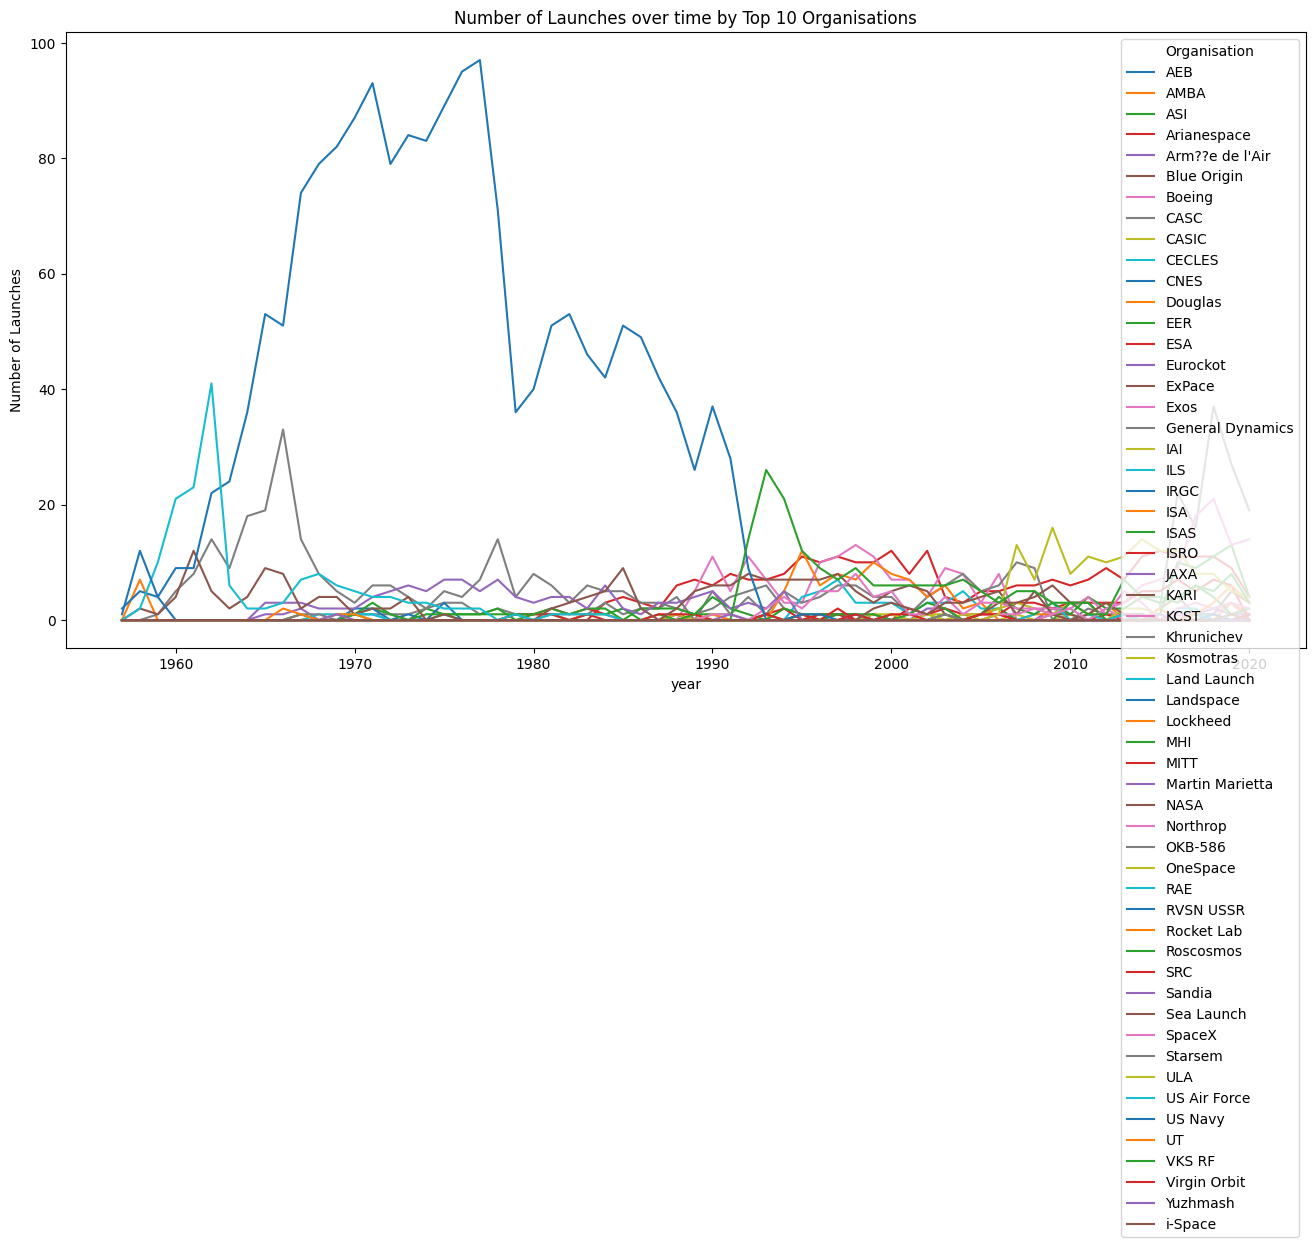

In [ ]:
launches_by_top.plot(
    figsize=(16,8),
    title = 'Number of Launches over time by Top 10 Organisations',
)

plt.ylabel('Number of Launches')
plt.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [ ]:
cold_war = df_data.loc[df_data.year < 1992]

In [ ]:
cold_war

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country,year,month
1717,CASC,"LC-3, Xichang Satellite Launch Center, China",1991-12-28 12:00:00+00:00,Long March 3 | DFH-2A-T5,StatusRetired,NaN,Partial Failure,CHN,1991,12
1718,RVSN USSR,"Site 175/58, Baikonur Cosmodrome, Kazakhstan",1991-12-20 00:00:00+00:00,Rokot/Briz K | GVM Demo Flight,StatusRetired,NaN,Success,KAZ,1991,12
1719,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russia",1991-12-18 03:54:00+00:00,Tsyklon-3 | Intercosmos 25 & Magion 3,StatusRetired,NaN,Success,RUS,1991,12
1720,Arianespace,"ELA-2, Guiana Space Centre, French Guiana, France",1991-12-16 22:19:00+00:00,"Ariane 44L | Telecom 2A, Inmarsat 2F3",StatusRetired,NaN,Success,FRA,1991,12
1721,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA",1991-12-07 22:47:00+00:00,Atlas II | Eutelsat 2F3,StatusRetired,NaN,Success,USA,1991,12
...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,1958,2
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,USA,1958,2
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,1957,12
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,KAZ,1957,11


In [ ]:
for country in cold_war['country'].drop_duplicates():
  print(countries.get(country))

Country(name='China', alpha2='CN', alpha3='CHN', numeric='156', apolitical_name='China')
Country(name='Kazakhstan', alpha2='KZ', alpha3='KAZ', numeric='398', apolitical_name='Kazakhstan')
Country(name='Russian Federation', alpha2='RU', alpha3='RUS', numeric='643', apolitical_name='Russian Federation')
Country(name='France', alpha2='FR', alpha3='FRA', numeric='250', apolitical_name='France')
Country(name='United States of America', alpha2='US', alpha3='USA', numeric='840', apolitical_name='United States of America')
Country(name='Japan', alpha2='JP', alpha3='JPN', numeric='392', apolitical_name='Japan')
Country(name='Israel', alpha2='IL', alpha3='ISR', numeric='376', apolitical_name='Israel')
Country(name='India', alpha2='IN', alpha3='IND', numeric='356', apolitical_name='India')
Country(name='Kenya', alpha2='KE', alpha3='KEN', numeric='404', apolitical_name='Kenya')
Country(name='Australia', alpha2='AU', alpha3='AUS', numeric='036', apolitical_name='Australia')


In [ ]:
cold_war.country.replace({'KAZ' : 'RUS'}, inplace=True)
cold_war.country.value_counts()

<ipython-input-83-23244f36ee25>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



RUS    1770
USA     662
FRA      61
JPN      52
CHN      38
KEN       9
IND       7
AUS       6
ISR       2
Name: country, dtype: int64

In [ ]:
usa_ussr =cold_war[cold_war['country'].isin(['RUS', 'USA'])]
USA_USSR=usa_ussr.country.value_counts()

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [ ]:
px.pie(
    title = 'Total Number of Launches (USSR vs USA)',
    values = usa_ussr['country'].value_counts(),
    names = usa_ussr['country'].value_counts().index,
)

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [ ]:
cold_war_launch_by_year = usa_ussr.groupby(['year','country'])['Mission_Status'].count().unstack(level=1)
cold_war_launch_by_year

country,RUS,USA
year,,
1957,2,1
1958,5,23
1959,4,16
1960,9,30
1961,9,43
1962,22,60
1963,24,17
1964,36,24
1965,53,33


<Axes: title={'center': 'Total Launches by Year (USSR vs USA)'}, xlabel='year'>

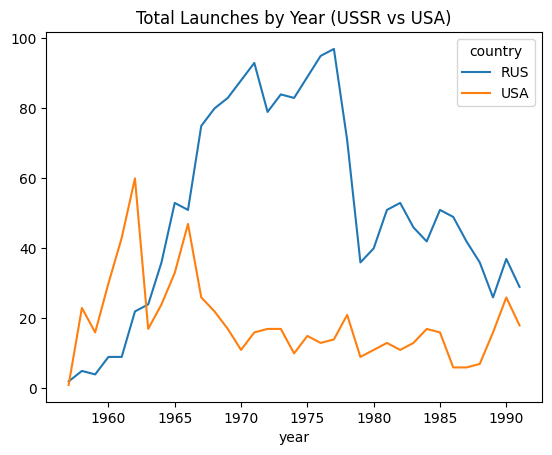

In [ ]:
cold_war_launch_by_year.plot(title='Total Launches by Year (USSR vs USA)')

## Chart the Total Number of Mission Failures Year on Year.

In [ ]:
usa_ussr.head(2)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country,year,month
1718,RVSN USSR,"Site 175/58, Baikonur Cosmodrome, Kazakhstan",1991-12-20 00:00:00+00:00,Rokot/Briz K | GVM Demo Flight,StatusRetired,NaN,Success,RUS,1991,12
1719,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russia",1991-12-18 03:54:00+00:00,Tsyklon-3 | Intercosmos 25 & Magion 3,StatusRetired,NaN,Success,RUS,1991,12


In [ ]:
failure = usa_ussr.loc[usa_ussr.Mission_Status !='Success']

In [ ]:
failure_date=usa_ussr[usa_ussr.Mission_Status!='Success'].groupby(['year', 'country'])['Mission_Status'].count().unstack(level=1)
failure_date.fillna(0, inplace=True)
failure_date

country,RUS,USA
year,,
1957,0.00,1.00
1958,4.00,18.00
1959,2.00,10.00
1960,6.00,14.00
1961,4.00,16.00
1962,7.00,10.00
1963,8.00,4.00
1964,7.00,5.00
1965,6.00,7.00


<Axes: title={'center': 'failed mission'}, xlabel='year'>

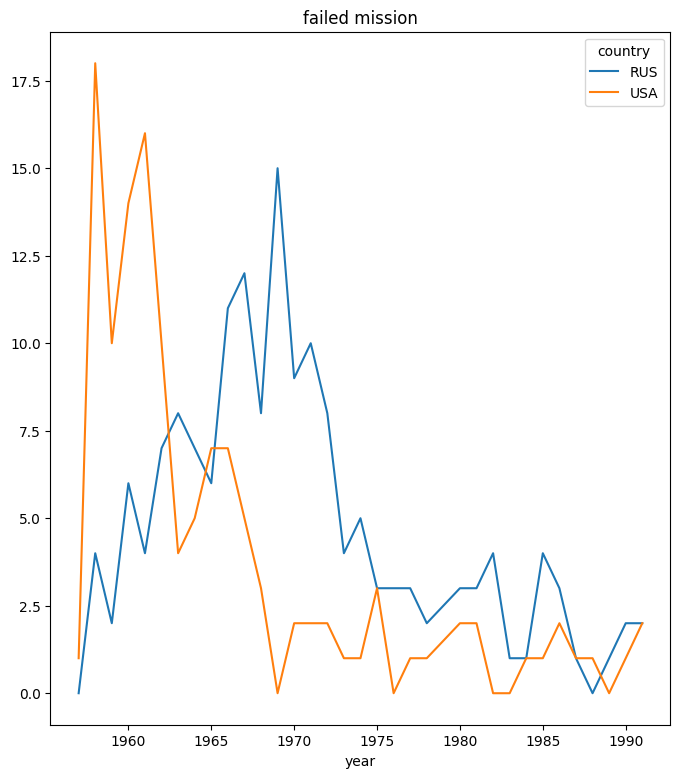

In [ ]:
failure_date.plot(title='failed mission', figsize=(8,9))

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

In [ ]:
cold_war_failpct_by_year = failure_date/cold_war_launch_by_year * 100
cold_war_failpct_by_year.fillna(0, inplace=True)
cold_war_failpct_by_year

country,RUS,USA
year,,
1957,0.00,100.00
1958,80.00,78.26
1959,50.00,62.50
1960,66.67,46.67
1961,44.44,37.21
1962,31.82,16.67
1963,33.33,23.53
1964,19.44,20.83
1965,11.32,21.21


<Axes: xlabel='year'>

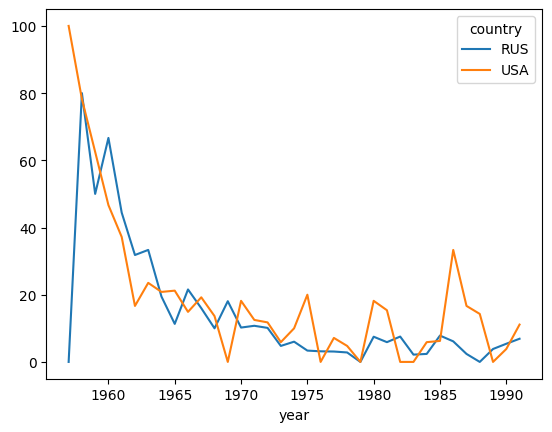

In [ ]:
cold_war_failpct_by_year.plot()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [ ]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country,year,month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,2020,8
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN,2020,8
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,2020,8
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ,2020,7
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,2020,7


In [ ]:
total_launches=df_data.groupby(['year', 'country'])['Mission_Status'].count().unstack(level=1)
total_launches.fillna(0, inplace=True)
total_launches

country,AUS,BRA,CHN,FRA,IND,IRN,ISR,JPN,KAZ,KEN,KIR,KOR,NZL,PRK,RUS,USA
year,,,,,,,,,,,,,,,,
1957,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
1958,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,23.00
1959,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,16.00
1960,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.00,0.00,0.00,0.00,0.00,0.00,0.00,30.00
1961,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.00,0.00,0.00,0.00,0.00,0.00,2.00,43.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,0.00,0.00,22.00,11.00,7.00,0.00,1.00,4.00,11.00,0.00,0.00,0.00,0.00,1.00,6.00,27.00
2017,0.00,0.00,18.00,11.00,5.00,1.00,0.00,7.00,13.00,0.00,0.00,0.00,1.00,0.00,6.00,30.00
2018,0.00,0.00,39.00,11.00,7.00,0.00,0.00,6.00,9.00,0.00,0.00,0.00,3.00,0.00,8.00,34.00


<Axes: xlabel='year'>

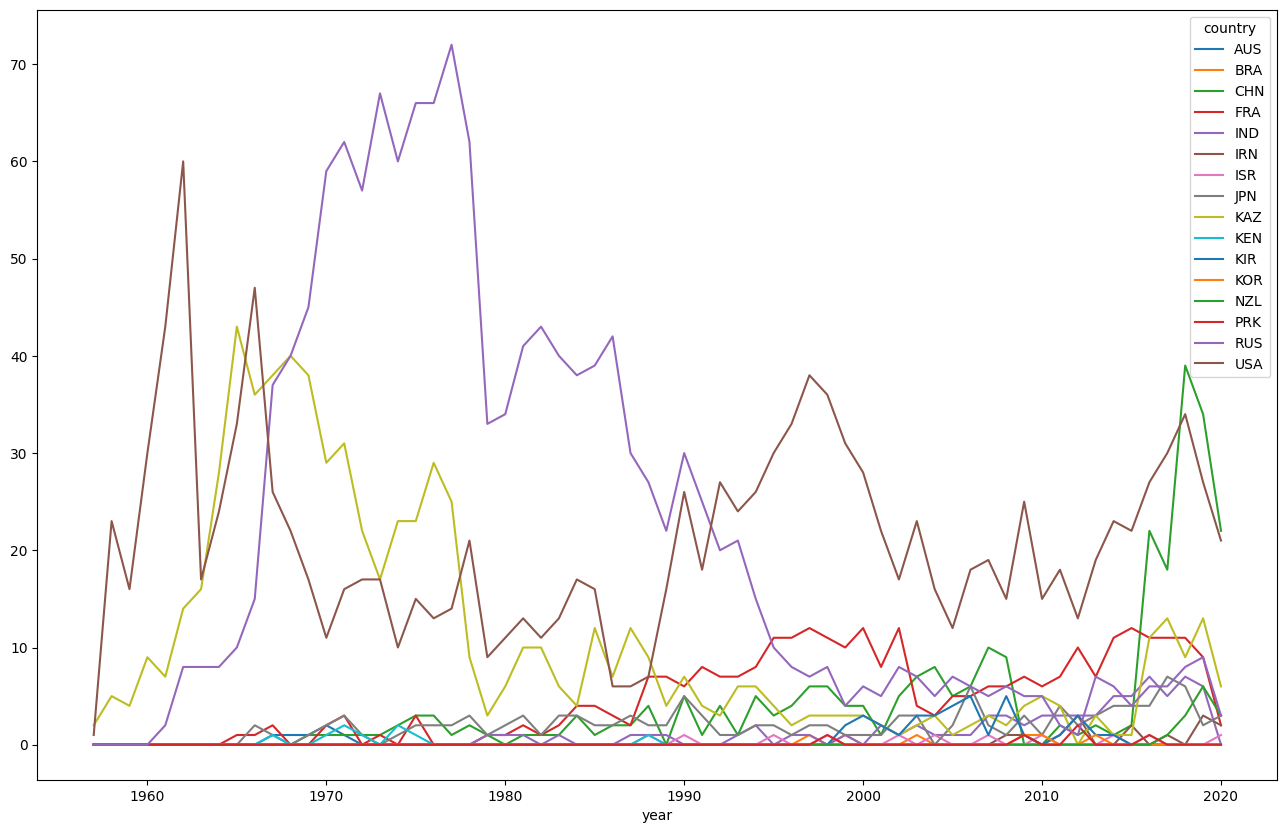

In [ ]:
total_launches.plot(figsize=(16,10))

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

In [ ]:
total_launches=df_data.groupby(['year', 'Organisation'])['Mission_Status'].count().unstack(level=1)
total_launches.fillna(0, inplace=True)
total_launches

Organisation,AEB,AMBA,ASI,Arianespace,Arm??e de l'Air,Blue Origin,Boeing,CASC,CASIC,CECLES,...,SpaceX,Starsem,ULA,US Air Force,US Navy,UT,VKS RF,Virgin Orbit,Yuzhmash,i-Space
year,,,,,,,,,,,,,,,,,,,,,
1957,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
1958,0.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,2.00,12.00,0.00,0.00,0.00,0.00,0.00
1959,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,10.00,4.00,0.00,0.00,0.00,0.00,0.00
1960,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,21.00,0.00,0.00,0.00,0.00,0.00,0.00
1961,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,23.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,0.00,0.00,0.00,11.00,0.00,4.00,0.00,22.00,0.00,0.00,...,9.00,0.00,12.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00
2017,0.00,0.00,0.00,11.00,0.00,1.00,0.00,16.00,1.00,0.00,...,18.00,0.00,8.00,0.00,0.00,0.00,6.00,0.00,0.00,0.00
2018,0.00,0.00,0.00,11.00,0.00,2.00,0.00,37.00,0.00,0.00,...,21.00,0.00,8.00,0.00,0.00,0.00,5.00,0.00,0.00,0.00


<Axes: xlabel='year'>

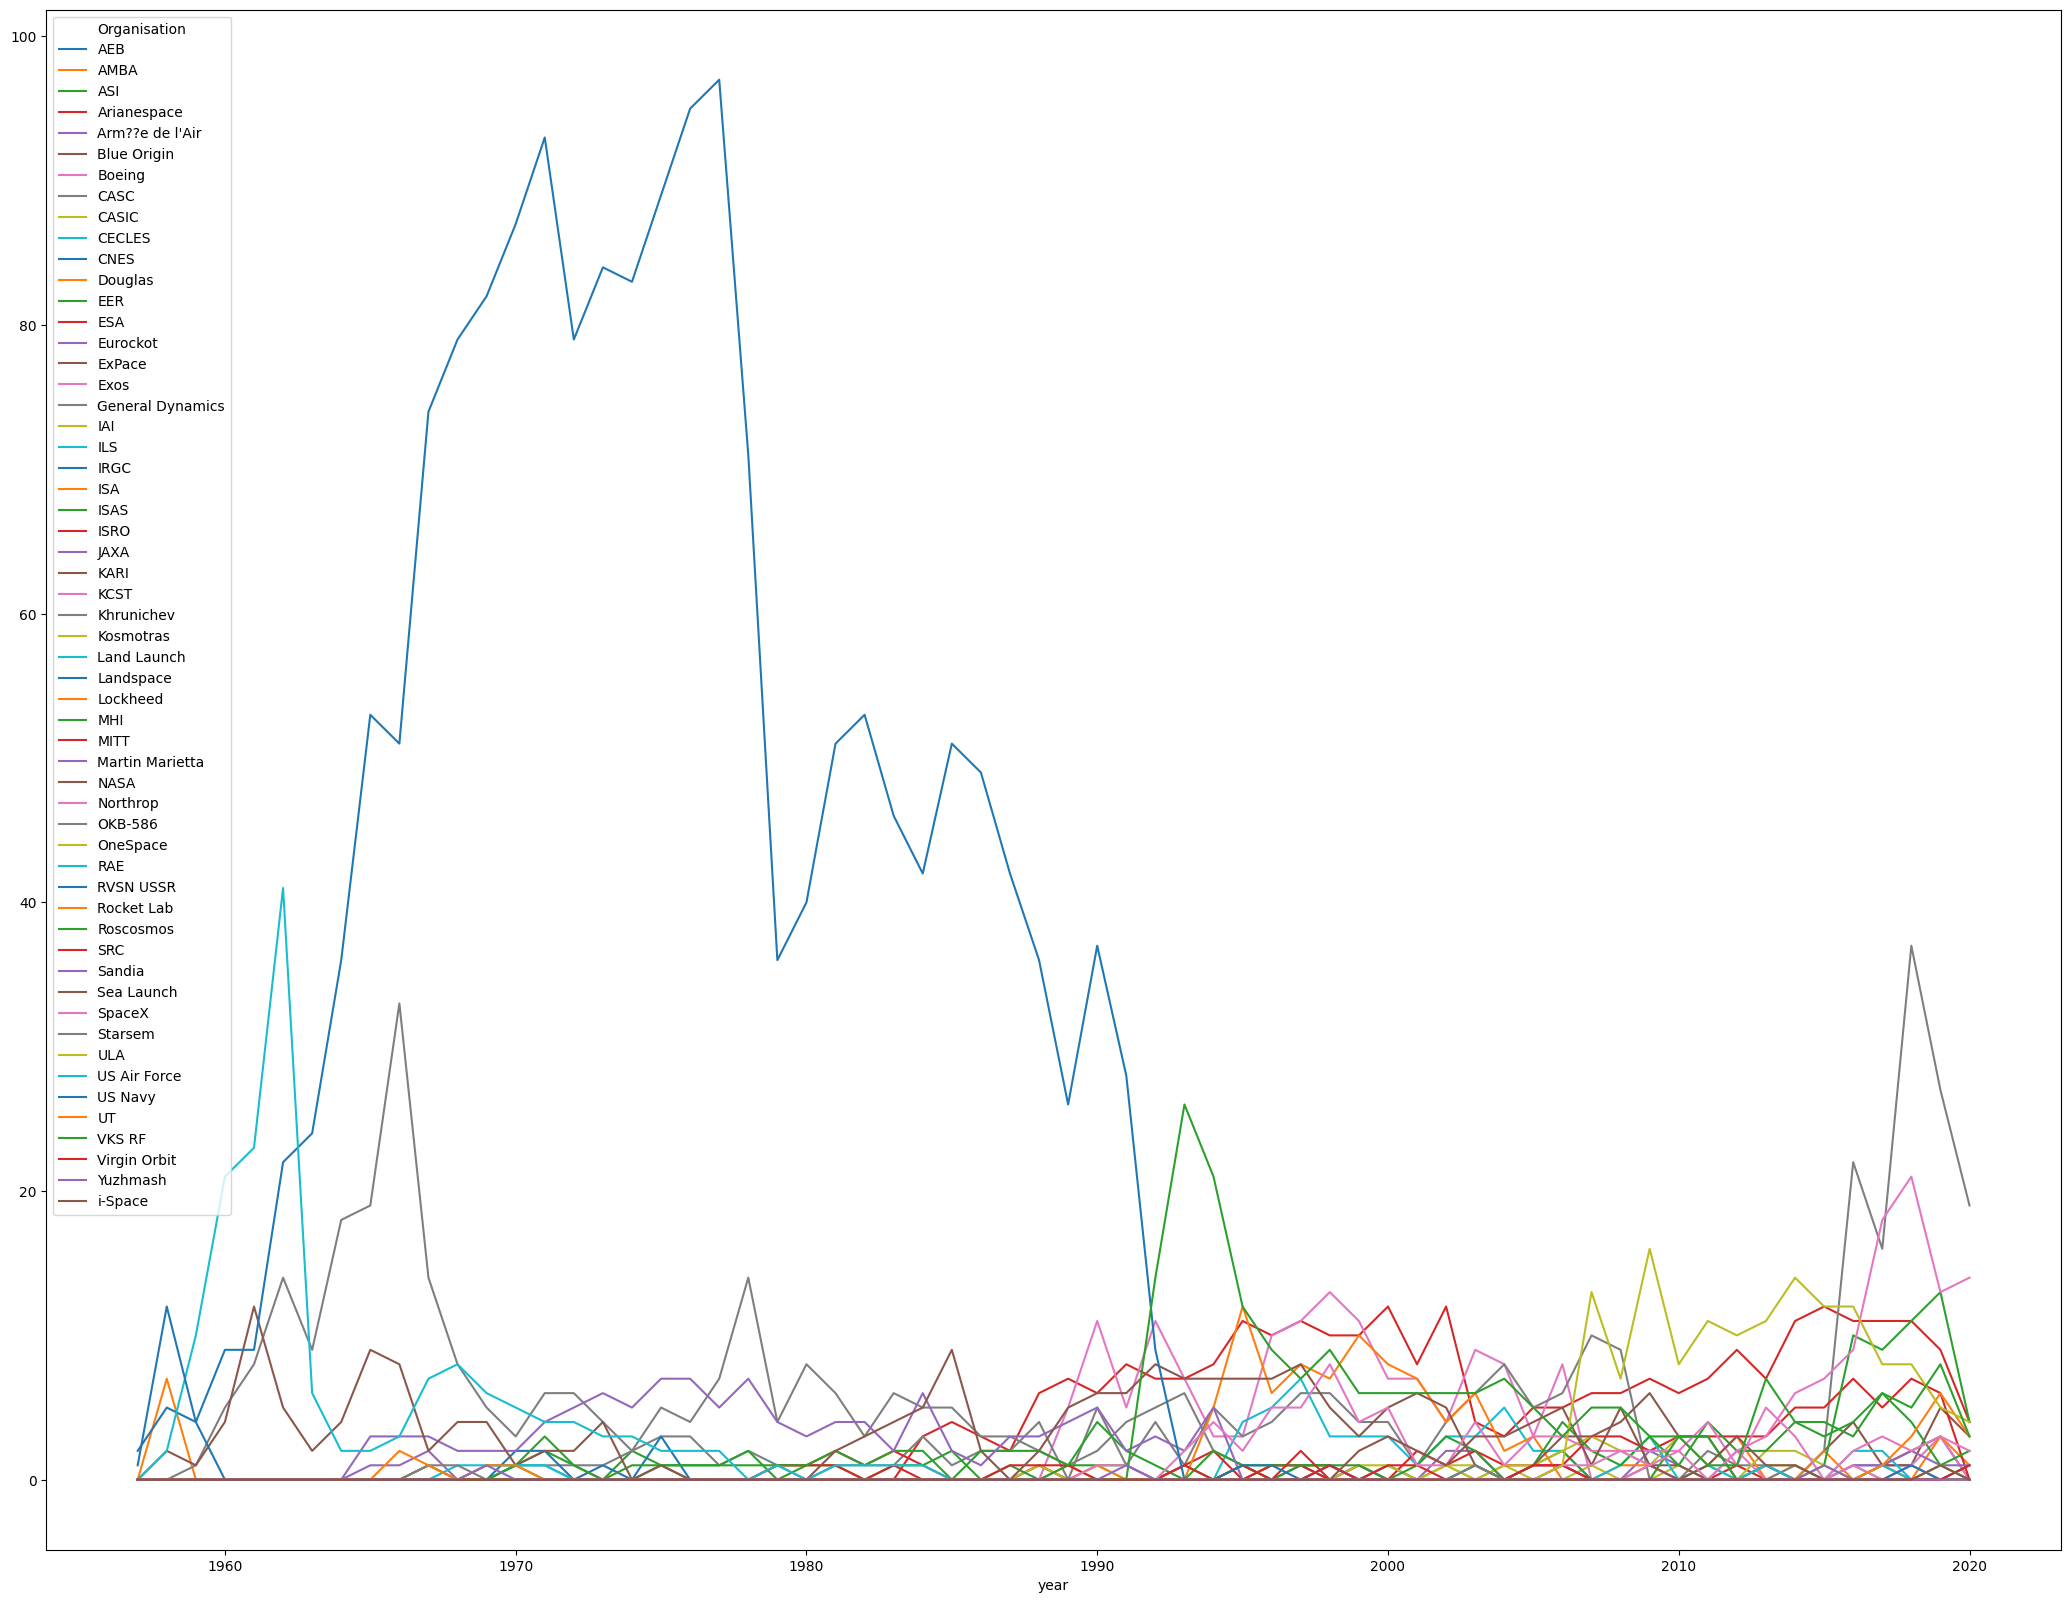

In [ ]:
total_launches.plot(figsize=(26,20))